In [1]:
# See https://keras.io/applications for details
# from tensorflow.keras.applications.densenet import DenseNet121 as DenseNet
# from tensorflow.keras.applications.densenet import DenseNet169 as DenseNet
from tensorflow.keras.applications.densenet import DenseNet201 as DenseNet
from tensorflow.keras.applications.densenet import decode_predictions, preprocess_input


model = DenseNet()

82526208/82524592 [==============================] - 4s 0us/step


In [2]:
# Uncomment to see the model's layer information.
# model.summary()

In [3]:
# Model analysis steps:
# 1. Build a dictionary of variables keyed by their name.
# 2. Look at the names of the initial 5 layers with trainable variables.
# 3. Find the variable name that holds the kernel of the first convolutional layer.
variable_by_name = {v.name: v for v in model.weights}
top5 = [v.name for v in model.weights[:5]]
top5

['conv1/conv/kernel:0',
 'conv1/bn/gamma:0',
 'conv1/bn/beta:0',
 'conv1/bn/moving_mean:0',
 'conv1/bn/moving_variance:0']

In [4]:
# Now we know that the variable of interest is named 'conv1/conv/kernel:0'.
conv1_kernel = variable_by_name['conv1/conv/kernel:0']

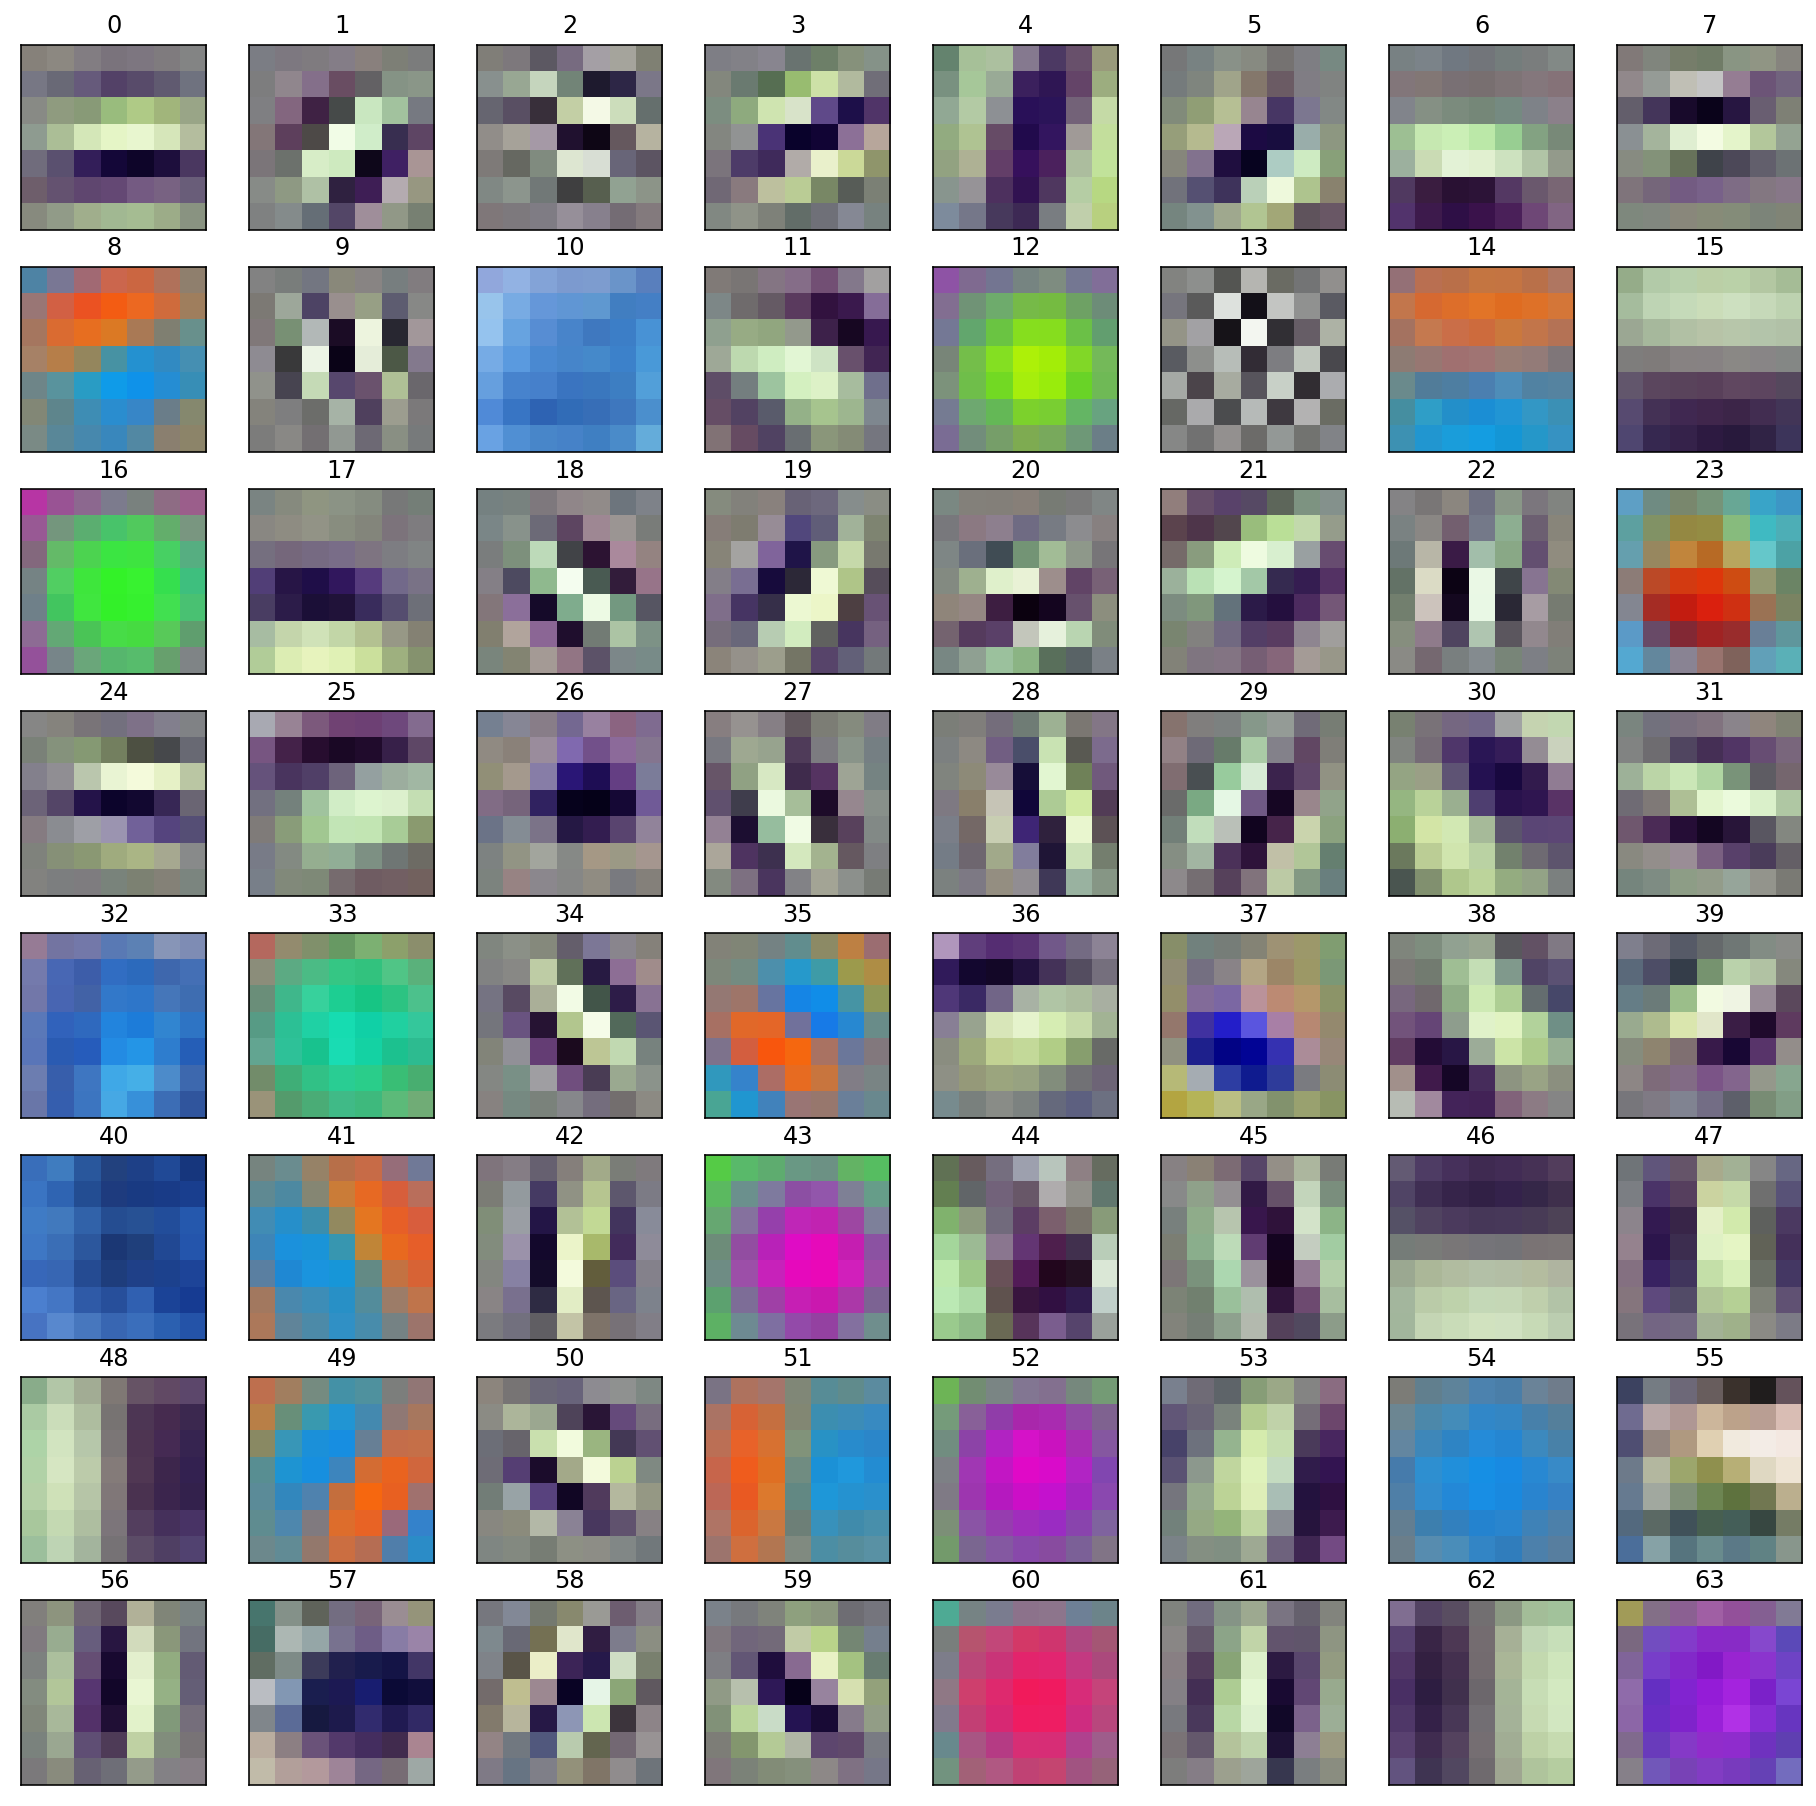

In [6]:
%config InlineBackend.figure_format = 'retina'

from utils.plot import plot_conv_kernel
plot_conv_kernel(conv1_kernel)

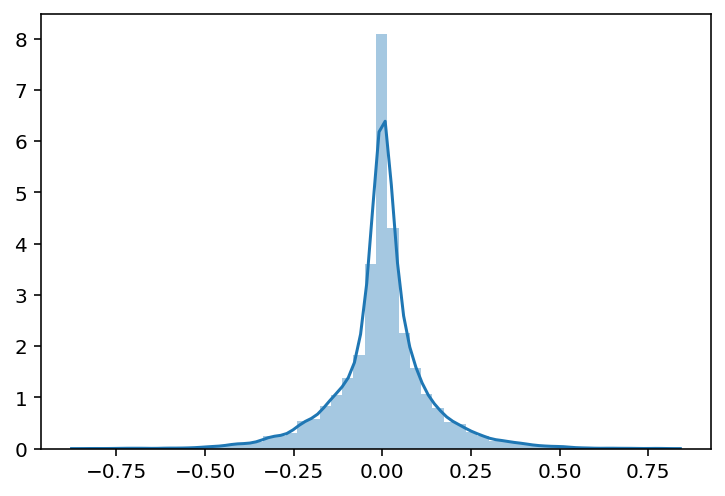

In [31]:
# Let's look at the distribution of weights in this kernel.

import seaborn as sns
sns.distplot(tf.reshape(conv1_kernel, shape=-1))